# Basic Statistics for Time Series Analysis 

## Import libraries and dataset 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

%matplotlib inline

In [2]:
data = pd.read_csv('shampoo.csv')

### Show dataset 

In [3]:
data

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [4]:
data.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [5]:
data.head(10)

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


### Dataset summary 

In [6]:
data.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [7]:
data.mean()

Sales    312.6
dtype: float64

In [8]:
data.std()

Sales    148.937164
dtype: float64

### Visualizations 

#### Histograms 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C1ABAE2388>]],
      dtype=object)

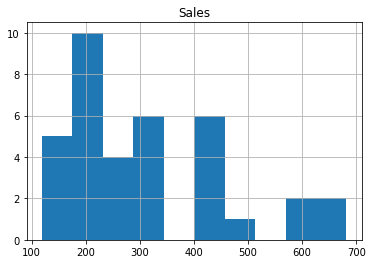

In [9]:
data.hist()

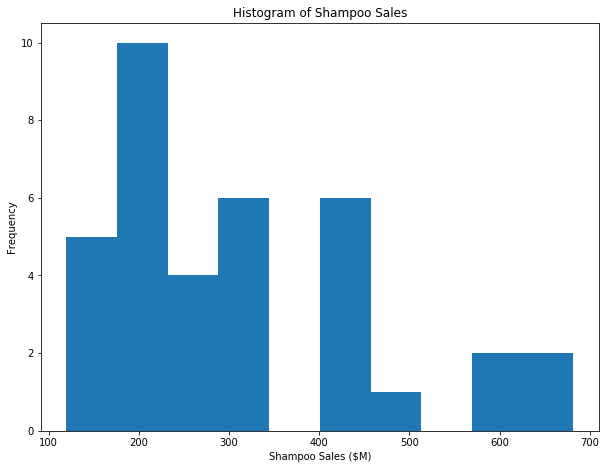

In [10]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure

plt.hist(data['Sales'])
plt.title('Histogram of Shampoo Sales');
plt.xlabel('Shampoo Sales ($M)');
plt.ylabel('Frequency');

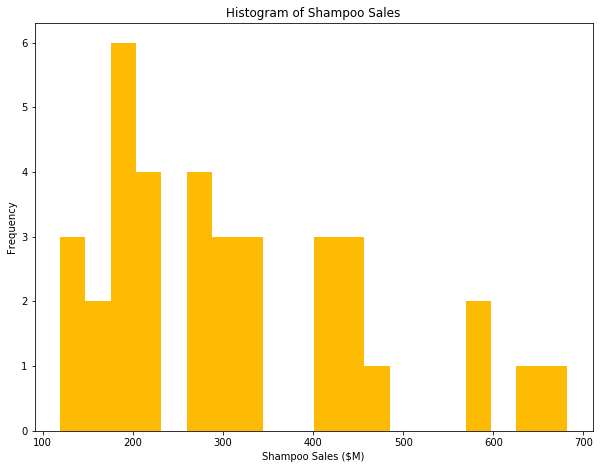

In [11]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure

plt.hist(data['Sales'], bins=20, color='#fcba03')
plt.title('Histogram of Shampoo Sales');
plt.xlabel('Shampoo Sales ($M)');
plt.ylabel('Frequency');

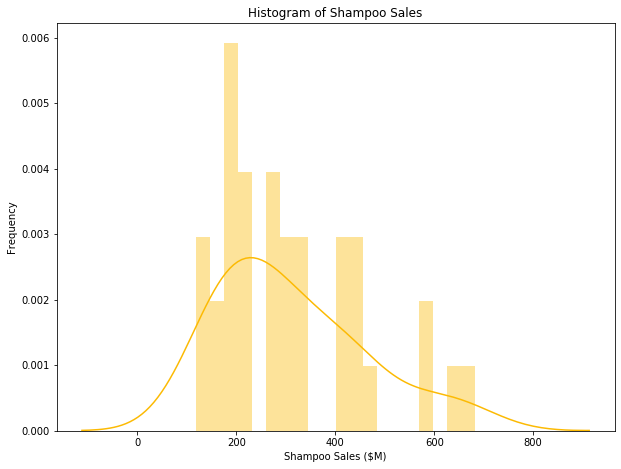

In [12]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure

sns.distplot(data['Sales'], bins=20, hist=True, kde=True, color='#fcba03');
plt.title('Histogram of Shampoo Sales');
plt.xlabel('Shampoo Sales ($M)');
plt.ylabel('Frequency');

#### Scatter Plots 

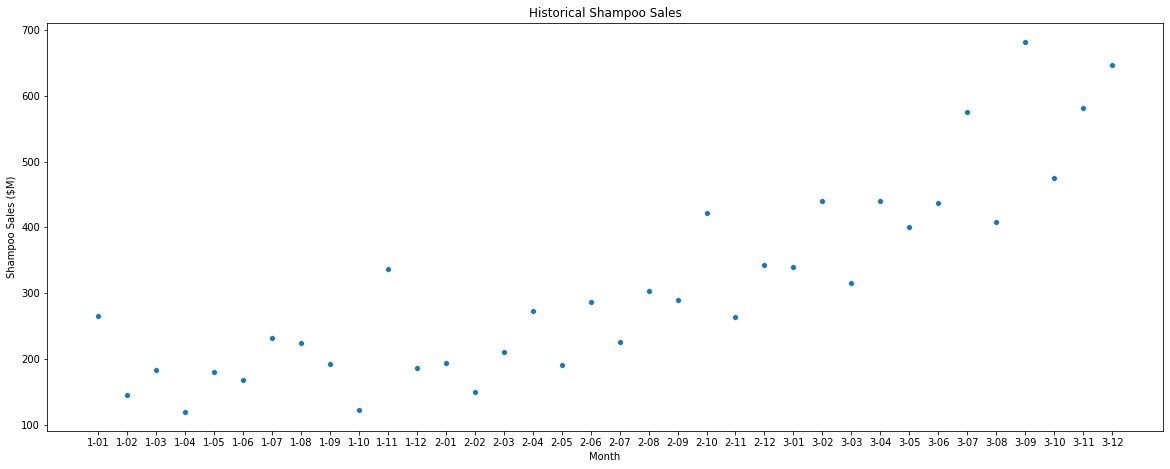

In [13]:
plt.figure(figsize=[20, 7.5]); # Set dimensions for figure

sns.scatterplot(x=data['Month'], y=data['Sales']);
plt.title('Historical Shampoo Sales');
plt.ylabel('Shampoo Sales ($M)');
plt.xlabel('Month');

### Basic Statistics 

In [14]:
# Dataset from here: https://www.co2.earth/historical-co2-datasets
co2_dataset = pd.read_csv('co2_dataset.csv')

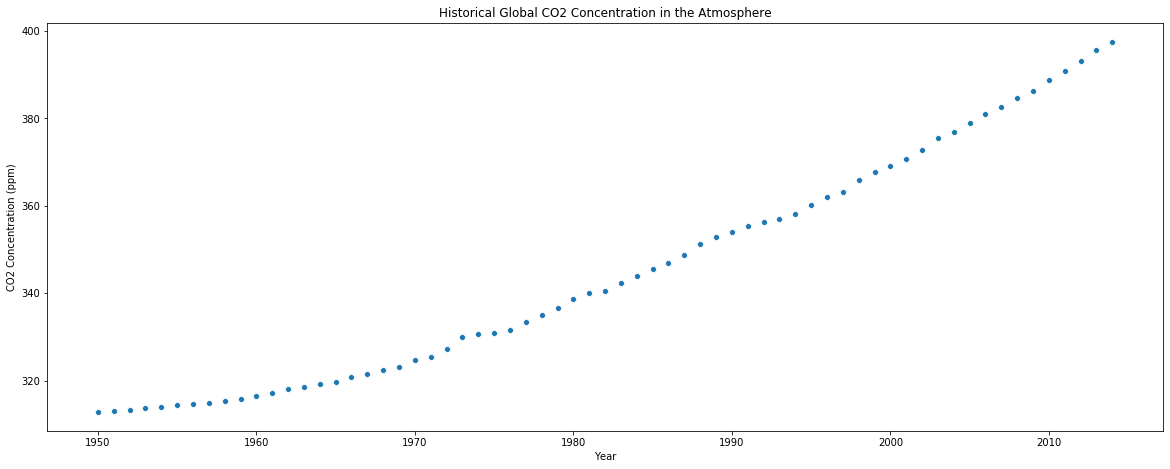

In [15]:
plt.figure(figsize=[20, 7.5]); # Set dimensions for figure

# Let's only consider the data from the year 1950
X = co2_dataset['year'].values[1950:]
y = co2_dataset['data_mean_global'].values[1950:]

sns.scatterplot(x=X, y=y);
plt.title('Historical Global CO2 Concentration in the Atmosphere');
plt.ylabel('CO2 Concentration (ppm)');
plt.xlabel('Year');

In [16]:
X = co2_dataset['year'].values[1950:].reshape(-1, 1)
y = co2_dataset['data_mean_global'].values[1950:].reshape(-1, 1)

reg = LinearRegression()

reg.fit(X, y)

print(f"The slope is {reg.coef_[0][0]} and the intercept is {reg.intercept_[0]}")

The slope is 1.358871192943465 and the intercept is -2348.0338300545372


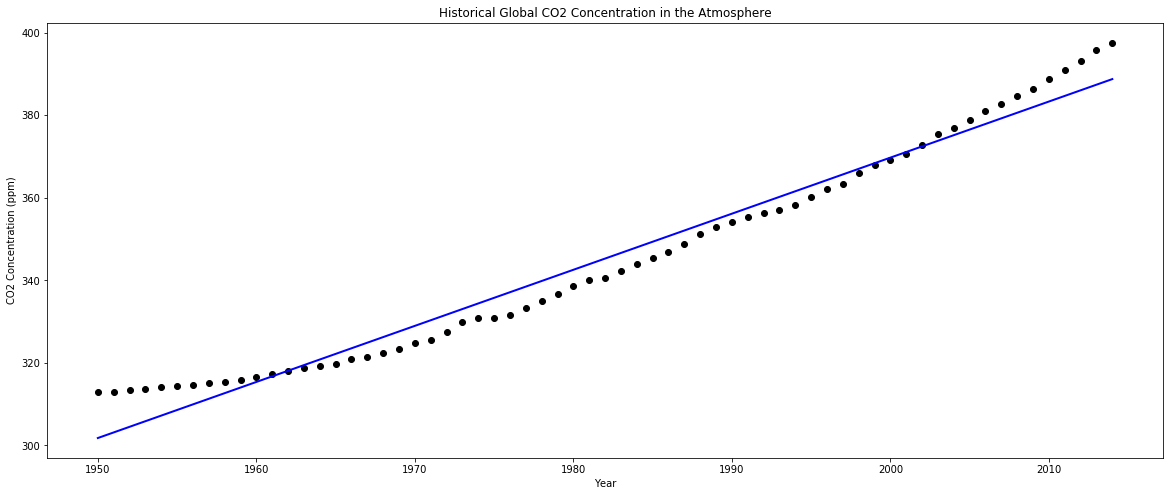

In [17]:
X = co2_dataset['year'].values[1950:]
y = co2_dataset['data_mean_global'].values[1950:]

predictions = reg.predict(X.reshape(-1, 1))

plt.figure(figsize=(20, 8))
plt.scatter(X, y,c='black')
plt.plot(X, predictions, c='blue', linewidth=2)
plt.title('Historical Global CO2 Concentration in the Atmosphere');
plt.ylabel('CO2 Concentration (ppm)');
plt.xlabel('Year');
plt.show()

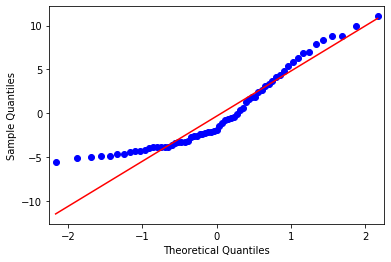

In [26]:
X = sm.add_constant(co2_dataset['year'].values[1950:])
model = sm.OLS(co2_dataset['data_mean_global'].values[1950:], X).fit()
residuals = model.resid
qq_plot = sm.qqplot(residuals, line='q')
plt.show()

In [25]:
X = sm.add_constant(co2_dataset['year'].values[1950:])
model = sm.OLS(co2_dataset['data_mean_global'].values[1950:], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     2073.
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           6.40e-50
Time:                        10:20:17   Log-Likelihood:                -189.19
No. Observations:                  65   AIC:                             382.4
Df Residuals:                      63   BIC:                             386.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2348.0338     59.161    -39.689      0.0

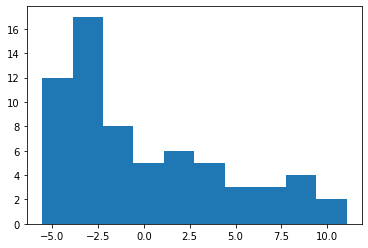

In [28]:
X = sm.add_constant(co2_dataset['year'].values[1950:])
model = sm.OLS(co2_dataset['data_mean_global'].values[1950:], X).fit()
residuals = model.resid

plt.hist(residuals);